#### importing the needed libraries for the project


In [1]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Start preparing the districts_info dataset


#### Cleaning and preprocessing of districts_info

In [2]:
df_districts = pd.read_csv('districts_info.csv')
df_districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


#### Looking for the number of nan values in each column


In [4]:

df_districts.isnull().sum()


district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

#### Looking for the percentage of nan values in each column


In [5]:

(df_districts.isnull().sum()/len(df_districts))*100

district_id                  0.000000
state                       24.463519
locale                      24.463519
pct_black/hispanic          24.463519
pct_free/reduced            36.480687
county_connections_ratio    30.472103
pp_total_raw                49.356223
dtype: float64

#### Count the number of rows where all columns (excluding 'district_id') are NaN


In [6]:
nan_rows_count = df_districts[df_districts.drop('district_id', axis=1).isna().all(axis=1)].shape[0]

print(f"Number of rows where all columns are NaN (except 'district_id'): {nan_rows_count}")


Number of rows where all columns are NaN (except 'district_id'): 57


#### Remove rows where all columns (except 'district_id') are NaN


In [7]:
df_districts_cleaned = df_districts.dropna(subset=df_districts.columns.difference(['district_id']), how='all')


#### Now df_cleaned contains rows where at least one column (excluding 'district_id') is not NaN


#### relook at dataset


In [8]:
print(df_districts_cleaned.info())
(df_districts_cleaned.isnull().sum()/len(df_districts))*100

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               176 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.0+ KB
None


district_id                  0.000000
state                        0.000000
locale                       0.000000
pct_black/hispanic           0.000000
pct_free/reduced            12.017167
county_connections_ratio     6.008584
pp_total_raw                24.892704
dtype: float64

#### for the columns 'pct_black/hispanic', 'pct_free/reduced' ,'county_connections_ratio', 'pp_total_raw'
it is better that instead of having a range of two values we can put the mean of this values to make the these columns numerical

In [9]:



# Create a copy of the dataframe to avoid modifying the original dataframe
df_districts_cleaned_avg = df_districts_cleaned.copy()

# Convert categorical ranges to their average values
range_columns = ['pct_black/hispanic', 'pct_free/reduced' ,'county_connections_ratio', 'pp_total_raw']


for column in range_columns:
    # Check if the column contains float values
    if df_districts_cleaned_avg[column].dtype == float:
        continue

    # Apply operations only if the column contains string values
    df_districts_cleaned_avg[column] = df_districts_cleaned_avg[column].apply(
        lambda x: np.mean(list(map(float, x.strip('[]').split(',')))) if isinstance(x, str) else x
    )

#recheck the data        
print(df_districts_cleaned_avg.head())

   district_id           state  locale  pct_black/hispanic  pct_free/reduced  \
0         8815        Illinois  Suburb                 0.1               0.1   
2         4921            Utah  Suburb                 0.1               0.3   
5         5987       Wisconsin  Suburb                 0.1               0.1   
6         3710            Utah  Suburb                 0.1               0.5   
7         7177  North Carolina  Suburb                 0.3               0.3   

   county_connections_ratio  pp_total_raw  
0                      0.59       15000.0  
2                      0.59        7000.0  
5                      0.59       11000.0  
6                      0.59        7000.0  
7                      0.59        9000.0  


#### Understand the distribution of values in the columns that contain missing values


In [10]:

columns_to_check = ['pct_free/reduced', 'county_connections_ratio', 'pp_total_raw']

for column in columns_to_check:
    unique_values = df_districts_cleaned_avg[column].value_counts()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")


Column: pct_free/reduced
pct_free/reduced
0.3    48
0.1    46
0.5    37
0.7    13
0.9     4
Name: count, dtype: int64


Column: county_connections_ratio
county_connections_ratio
0.59    161
1.50      1
Name: count, dtype: int64


Column: pp_total_raw
pp_total_raw
9000.0     30
11000.0    17
15000.0    15
13000.0    15
7000.0     13
17000.0    13
19000.0     8
21000.0     2
23000.0     2
5000.0      2
33000.0     1
Name: count, dtype: int64




#### understand the distribution of values in the columns that contain missing values using diagrams


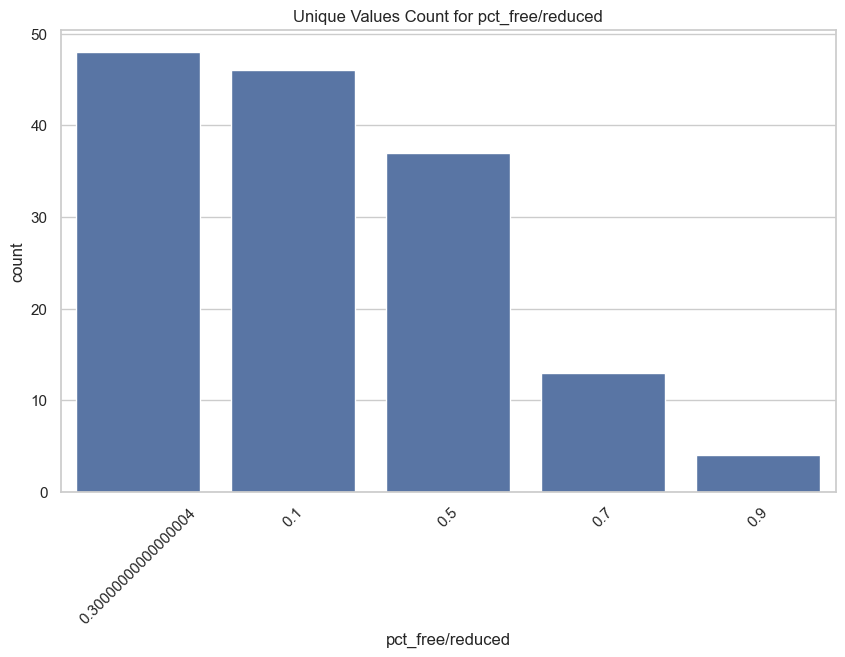

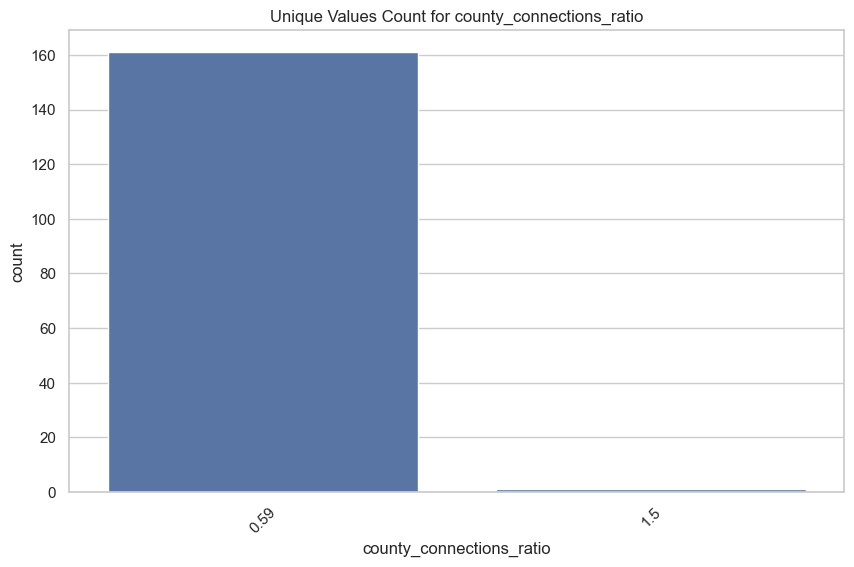

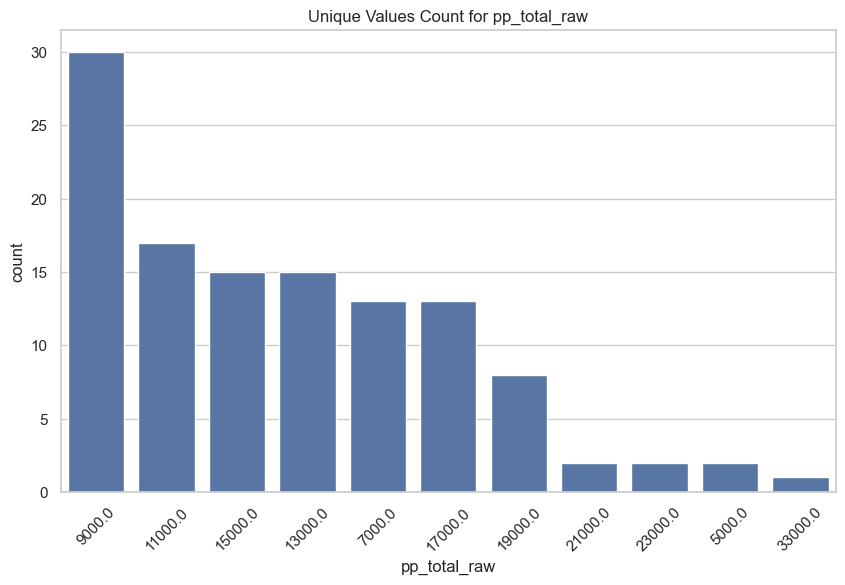

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better visualization
sns.set(style="whitegrid")

columns_to_check = ['pct_free/reduced', 'county_connections_ratio', 'pp_total_raw']

# Plot each column
for column in columns_to_check:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_districts_cleaned_avg, order=df_districts_cleaned_avg[column].value_counts().index)
    plt.title(f'Unique Values Count for {column}')
    plt.xticks(rotation=45)
    plt.show()


#### since all values but one of county_connections_ratio are equal to 0.59 i chose to fill the missing values in this column using 0.59 value


In [12]:

# Create a copy of the DataFrame
df_districts_cleaned_avg = df_districts_cleaned_avg.copy()

# Fill missing values in 'county_connections_ratio' with '[0.18, 1['
df_districts_cleaned_avg.loc[:, 'county_connections_ratio'].fillna(0.59, inplace=True)

# Verify the changes
print(df_districts_cleaned_avg['county_connections_ratio'].value_counts())


county_connections_ratio
0.59    175
1.50      1
Name: count, dtype: int64


#### check if the filling worked correctly


In [13]:
print(df_districts_cleaned_avg['county_connections_ratio'].value_counts())


county_connections_ratio
0.59    175
1.50      1
Name: count, dtype: int64


#### understand the distribution of values in the column pct_free/reduced before filling the missing values


In [14]:


columns_to_check = ['pct_free/reduced']

for column in columns_to_check:
    unique_values = df_districts_cleaned_avg[column].value_counts()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")

Column: pct_free/reduced
pct_free/reduced
0.3    48
0.1    46
0.5    37
0.7    13
0.9     4
Name: count, dtype: int64




#### I decided to use the KNNImputer to fill the missing values in pct_free/reduced column since the data is distributed in a way that doesnt allow us to fill the missing values with the most repeated value


In [15]:

from sklearn.impute import KNNImputer

# Create a copy of the dataframe to avoid modifying the original dataframe
df_districts_cleaned_imputed = df_districts_cleaned_avg.copy()

# Select columns for imputation
columns_for_imputation = ['pct_free/reduced']

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)

# Perform imputation
df_districts_cleaned_imputed[columns_for_imputation] = knn_imputer.fit_transform(df_districts_cleaned_imputed[columns_for_imputation])

# Verify the changes
print(df_districts_cleaned_imputed['pct_free/reduced'].value_counts())


pct_free/reduced
0.300000    48
0.100000    46
0.500000    37
0.339189    28
0.700000    13
0.900000     4
Name: count, dtype: int64


#### understand the distribution of values in the column pp_total_raw before filling the missing values


In [16]:

columns_to_check = ['pp_total_raw']

for column in columns_to_check:
    unique_values = df_districts_cleaned_imputed[column].value_counts()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")

Column: pp_total_raw
pp_total_raw
9000.0     30
11000.0    17
15000.0    15
13000.0    15
7000.0     13
17000.0    13
19000.0     8
21000.0     2
23000.0     2
5000.0      2
33000.0     1
Name: count, dtype: int64




#### i decided to use the KNNImputer to fill the missing values in pct_free/reduced column since the data is distributed in a way that doesnt allow us to fill the missing values with the most repeated value


In [17]:

from sklearn.impute import KNNImputer

# Create a copy of the dataframe to avoid modifying the original dataframe
df_districts_cleaned_imputed = df_districts_cleaned_imputed.copy()

# Select columns for imputation
columns_for_imputation = ['pp_total_raw']

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)

# Perform imputation
df_districts_cleaned_imputed[columns_for_imputation] = knn_imputer.fit_transform(df_districts_cleaned_imputed[columns_for_imputation])

# Verify the changes
print(df_districts_cleaned_imputed['pp_total_raw'].value_counts())


pp_total_raw
12474.576271    58
9000.000000     30
11000.000000    17
15000.000000    15
13000.000000    15
7000.000000     13
17000.000000    13
19000.000000     8
21000.000000     2
23000.000000     2
5000.000000      2
33000.000000     1
Name: count, dtype: int64


#### relook at dataset after filling the missing values


In [18]:

print(df_districts_cleaned_imputed.isnull().sum())
df_districts_cleaned_imputed.head()

district_id                 0
state                       0
locale                      0
pct_black/hispanic          0
pct_free/reduced            0
county_connections_ratio    0
pp_total_raw                0
dtype: int64


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,0.59,15000.0
2,4921,Utah,Suburb,0.1,0.3,0.59,7000.0
5,5987,Wisconsin,Suburb,0.1,0.1,0.59,11000.0
6,3710,Utah,Suburb,0.1,0.5,0.59,7000.0
7,7177,North Carolina,Suburb,0.3,0.3,0.59,9000.0


#### drawing the distribution of the data in a given column to capture the outliers


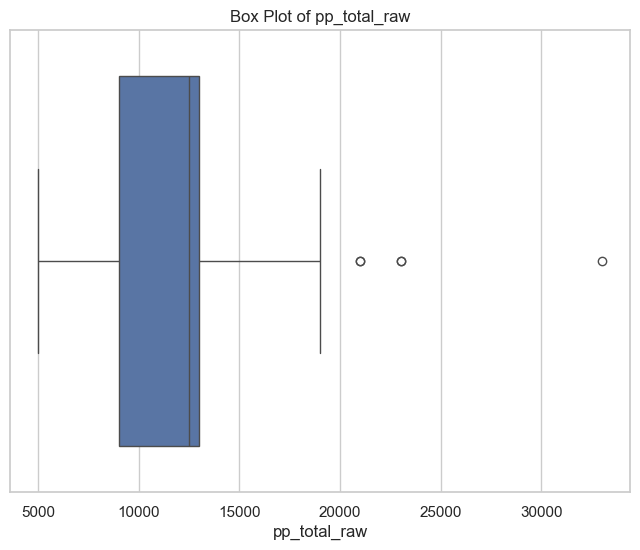

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the column for the box plot
column_to_check = 'pp_total_raw'

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_districts_cleaned_imputed[column_to_check])

# Set plot labels
plt.title('Box Plot of {}'.format(column_to_check))
plt.xlabel(column_to_check)

# Show the plot
plt.show()

#### replacing the outlier  from pp_total_raw column with the mean value of the column because we dont want to decrease and loose data


In [20]:

import numpy as np

# Create a copy of the dataframe to avoid modifying the original dataframe
df_districts_cleaned_imputed_outliers = df_districts_cleaned_imputed.copy()

# Specify the column to handle outliers
column_to_handle_outliers = 'pp_total_raw'

# Calculate the quartiles
Q1 = df_districts_cleaned_imputed_outliers[column_to_handle_outliers].quantile(0.25)
Q3 = df_districts_cleaned_imputed_outliers[column_to_handle_outliers].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the mean value
df_districts_cleaned_imputed_outliers[column_to_handle_outliers] = np.where(
    (df_districts_cleaned_imputed_outliers[column_to_handle_outliers] < lower_bound) |
    (df_districts_cleaned_imputed_outliers[column_to_handle_outliers] > upper_bound),
    df_districts_cleaned_imputed_outliers[column_to_handle_outliers].median(),
    df_districts_cleaned_imputed_outliers[column_to_handle_outliers]
)

# Display the modified DataFrame
print(df_districts_cleaned_imputed_outliers['pp_total_raw'].value_counts())




pp_total_raw
12474.576271    63
9000.000000     30
11000.000000    17
15000.000000    15
13000.000000    15
7000.000000     13
17000.000000    13
19000.000000     8
5000.000000      2
Name: count, dtype: int64


#### Drawing the distribution of the data in a given column after removing the outliers


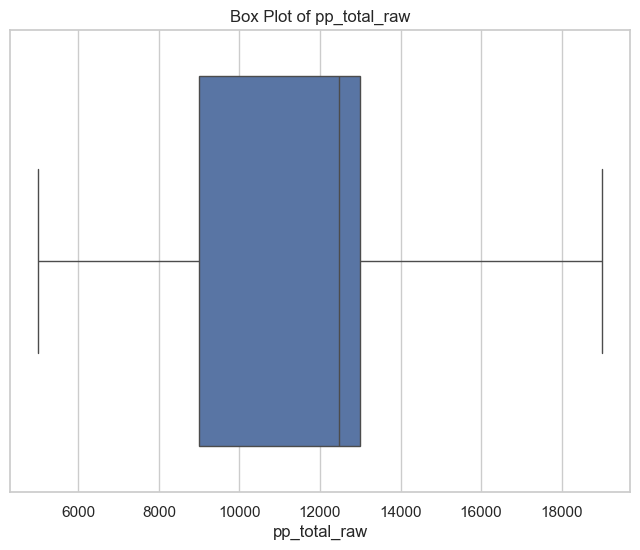

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the column for the box plot
column_to_check = 'pp_total_raw'

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_districts_cleaned_imputed_outliers[column_to_check])

# Set plot labels
plt.title('Box Plot of {}'.format(column_to_check))
plt.xlabel(column_to_check)

# Show the plot
plt.show()

In [22]:
print(df_districts_cleaned_imputed_outliers["county_connections_ratio"].value_counts())

county_connections_ratio
0.59    175
1.50      1
Name: count, dtype: int64


#### Drawing the distribution of the data in a given column before removing the outliers


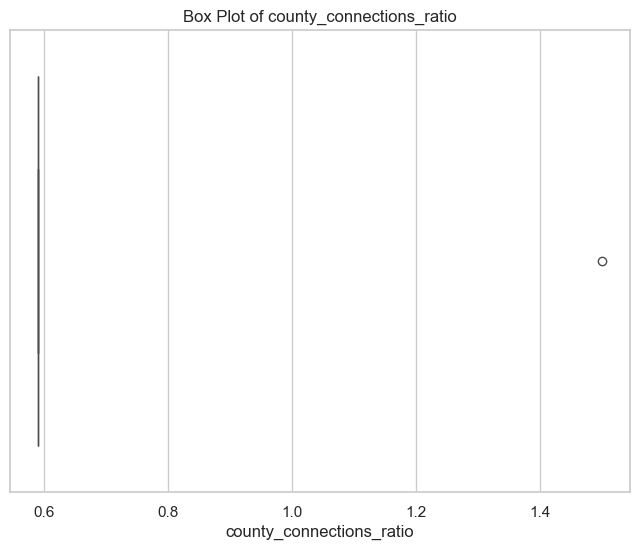

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the column for the box plot
column_to_check = 'county_connections_ratio'

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_districts_cleaned_imputed_outliers[column_to_check])

# Set plot labels
plt.title('Box Plot of {}'.format(column_to_check))
plt.xlabel(column_to_check)

# Show the plot
plt.show()

#### Replacing the outlier with the mean value  in county_connections_ratio column


In [24]:


# Specify the column to handle outliers
column_to_handle_outliers = 'county_connections_ratio'

# Calculate the quartiles
Q1 = df_districts_cleaned_imputed_outliers[column_to_handle_outliers].quantile(0.25)
Q3 = df_districts_cleaned_imputed_outliers[column_to_handle_outliers].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the mean value
df_districts_cleaned_imputed_outliers[column_to_handle_outliers] = np.where(
    (df_districts_cleaned_imputed_outliers[column_to_handle_outliers] < lower_bound) |
    (df_districts_cleaned_imputed_outliers[column_to_handle_outliers] > upper_bound),
    df_districts_cleaned_imputed_outliers[column_to_handle_outliers].median(),
    df_districts_cleaned_imputed_outliers[column_to_handle_outliers]
)

In [25]:
print(df_districts_cleaned_imputed_outliers["county_connections_ratio"].value_counts())

county_connections_ratio
0.59    176
Name: count, dtype: int64


#### Relook at dataset after filling the missing values


In [26]:

print(df_districts_cleaned_imputed_outliers.info())
print(df_districts_cleaned_imputed_outliers.isnull().sum())
df_districts_cleaned_imputed_outliers.head()
df_districts_cleaned_imputed_outliers.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               176 non-null    int64  
 1   state                     176 non-null    object 
 2   locale                    176 non-null    object 
 3   pct_black/hispanic        176 non-null    float64
 4   pct_free/reduced          176 non-null    float64
 5   county_connections_ratio  176 non-null    float64
 6   pp_total_raw              176 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 11.0+ KB
None
district_id                 0
state                       0
locale                      0
pct_black/hispanic          0
pct_free/reduced            0
county_connections_ratio    0
pp_total_raw                0
dtype: int64


,district_id,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
count,176.000000,176.000000,176.000000,1.760000e+02,176.000000
mean,5169.136364,0.239773,0.339189,5.900000e-01,12141.467643
std,2617.946570,0.230795,0.194388,2.338120e-15,3012.039387
min,1000.000000,0.100000,0.100000,5.900000e-01,5000.000000
25%,2871.500000,0.100000,0.100000,5.900000e-01,9000.000000
50%,4925.000000,0.100000,0.300000,5.900000e-01,12474.576271
75%,7625.500000,0.300000,0.500000,5.900000e-01,13000.000000
max,9927.000000,0.900000,0.900000,5.900000e-01,19000.000000


In [27]:
df_districts_cleaned_imputed_outliers["locale"].value_counts()

locale
Suburb    104
Rural      33
City       29
Town       10
Name: count, dtype: int64

In [28]:
df_districts_cleaned_imputed_outliers["state"].value_counts()

state
Connecticut             30
Utah                    29
Massachusetts           21
Illinois                18
California              12
Ohio                    11
New York                 8
Indiana                  7
Washington               6
Missouri                 6
Virginia                 4
North Carolina           4
Wisconsin                3
District Of Columbia     3
New Jersey               2
Texas                    2
Tennessee                2
New Hampshire            2
Michigan                 2
Minnesota                1
Arizona                  1
Florida                  1
North Dakota             1
Name: count, dtype: int64

In [29]:
df_districts_cleaned_imputed_outliers["pct_black/hispanic"].value_counts()

pct_black/hispanic
0.1    116
0.3     24
0.5     17
0.7     11
0.9      8
Name: count, dtype: int64

#### Check if there is any duplication

In [30]:
# Use the duplicated() method on the 'district_id' column
duplicate_df_districts_cleaned_imputed = df_districts_cleaned_imputed_outliers['district_id'].duplicated()

# Display the duplicate LP IDs
print("Duplicate LP IDs:")
print(df_districts_cleaned_imputed_outliers[duplicate_df_districts_cleaned_imputed])



Duplicate LP IDs:
Empty DataFrame
Columns: [district_id, state, locale, pct_black/hispanic, pct_free/reduced, county_connections_ratio, pp_total_raw]
Index: []


### we just ensured that there's no duplication so the dataset is ready

# Start preparing the products_info dataset

#### Cleaning and preprocessing of products_info

In [31]:
#Start preparing the products_info dataset
df_prod = pd.read_csv('products_info.csv')
df_prod.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


#### understand the dataset


In [32]:
print(df_prod.info())
print(df_prod.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB
None
LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64


#### understand the distribution of values in the columns that contain missing values


In [33]:

columns_to_check = ['Provider/Company Name', 'Sector(s)', 'Primary Essential Function']

for column in columns_to_check:
    unique_values = df_prod[column].value_counts()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")

Column: Provider/Company Name
Provider/Company Name
Google LLC                   30
Houghton Mifflin Harcourt     6
Microsoft                     6
IXL Learning                  4
Learning A-Z                  4
                             ..
Turnitin                      1
Neuron Fuel                   1
TypingClub                    1
US Holocaust Museum           1
InnerSloth                    1
Name: count, Length: 290, dtype: int64


Column: Sector(s)
Sector(s)
PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: count, dtype: int64


Column: Primary Essential Function
Primary Essential Function
LC - Digital Learning Platforms                                              74
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study T

#### since the number of missing values are low comparing with the entire size of the dataset i choose to fill the missing data 
#### with the most frequent category

In [34]:


column_to_fill = 'Provider/Company Name'

# Find the most frequent category
most_frequent_category = df_prod[column_to_fill].mode()[0]

# Fill missing values with the most frequent category
df_prod[column_to_fill].fillna(most_frequent_category, inplace=True)

column_to_fill = 'Sector(s)'

# Find the most frequent category
most_frequent_category = df_prod[column_to_fill].mode()[0]

# Fill missing values with the most frequent category
df_prod[column_to_fill].fillna(most_frequent_category, inplace=True)


column_to_fill = 'Primary Essential Function'

# Find the most frequent category
most_frequent_category = df_prod[column_to_fill].mode()[0]

# Fill missing values with the most frequent category
df_prod[column_to_fill].fillna(most_frequent_category, inplace=True)


#### check that all missing values are filled


In [35]:
print(df_prod.isnull().sum())

LP ID                         0
URL                           0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
dtype: int64


#### check if there's duplication
#### Use the duplicated() method to identify duplicate rows

In [36]:

duplicate_rows = df_prod.duplicated()

# Display the duplicate rows
print("Duplicate Rows:")
print(df_prod[duplicate_rows])

Duplicate Rows:
Empty DataFrame
Columns: [LP ID, URL, Product Name, Provider/Company Name, Sector(s), Primary Essential Function]
Index: []


In [37]:

columns_to_check = ['Primary Essential Function']

for column in columns_to_check:
    unique_values = df_prod[column].value_counts()
    print(f"Column: {column}")
    print(unique_values)
    print("\n")



Column: Primary Essential Function
Primary Essential Function
LC - Digital Learning Platforms                                              94
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study Tools                                                             25
LC - Courseware & Textbooks                                                  18
LC - Sites, Resources & Reference - Games & Simulations                      18
LC/CM/SDO - Other                                                            16
LC - Sites, Resources & Reference - Digital Collection & Repository          15
CM - Classroom Engagement & Instruction - Classroom Management               11
LC - Sites, Resources & Reference - Streaming Services                        9
CM - Virtual Classroom - Video Conferencing & Screen Sharing                  7
LC - Study Tools - Q&A                                    

### Searching for the LP ID of product related with the online learning

#### The products that have "Virtual Classroom" in their "Primary Essential Function" tends to be the product used for the remote learning

In [38]:
list_online = df_prod.loc[df_prod['Primary Essential Function'].str.contains("Virtual Classroom")]
list_online.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
52,48333,https://hangouts.google.com/,Google Hangouts,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
137,32050,https://www.webex.com/,WebEx,Cisco,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
193,61945,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
215,18982,https://www.gotomeeting.com/,GoToMeeting,LogMeIn,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
287,99580,https://loom.com/,"Loom - Video Recorder: Screen, Webcam and Mic","Loom, Inc",PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...


In [39]:
list_online.tail()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
193,61945,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
215,18982,https://www.gotomeeting.com/,GoToMeeting,LogMeIn,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
287,99580,https://loom.com/,"Loom - Video Recorder: Screen, Webcam and Mic","Loom, Inc",PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
345,98845,https://meet.google.com/_meet,Meet,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
355,22767,https://apps.apple.com/us/app/zoom-cloud-meeti...,ZOOM Cloud Meetings,"ZOOM VIDEO COMMUNICATIONS, INC.",PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...


In [40]:
LP_ID_Online_learning = list_online["LP ID"]

# now let's take one engagement data file at a time and discover it

In [41]:
df_eng_1000 = pd.read_csv('engagement_data/4808.csv')
df_eng_1000.head()

,time,lp_id,pct_access,engagement_index
0,2020-01-14,66933,0.31,3.13
1,2020-01-14,97280,2.19,178.68
2,2020-01-14,57084,0.63,12.54
3,2020-01-14,33185,3.45,178.68
4,2020-01-14,69863,3.45,43.89


In [42]:
print(df_eng_1000.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26791 entries, 0 to 26790
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              26791 non-null  object 
 1   lp_id             26791 non-null  int64  
 2   pct_access        26791 non-null  float64
 3   engagement_index  18093 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 837.3+ KB
None


#### Ploting the histogram of the Monthly sum of percentage of students that did an online access to any product for a given school district

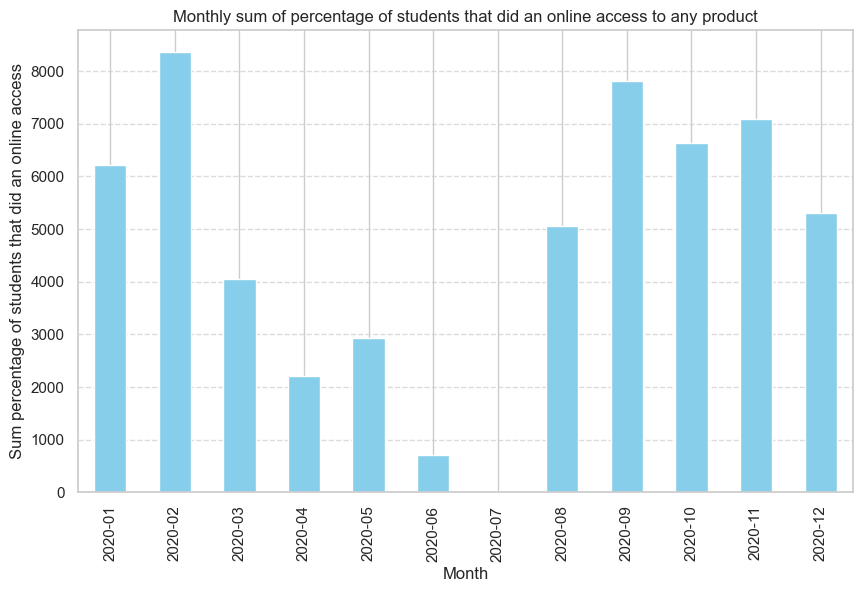

In [43]:

import pandas as pd
import matplotlib.pyplot as plt

df_eng_1000['time'] = pd.to_datetime(df_eng_1000['time'])

selected_lp_df = df_eng_1000

selected_lp_df = selected_lp_df.sort_values(by='time')

# Group by month and calculate the mean pct_access for each month
monthly_means = selected_lp_df.groupby(selected_lp_df['time'].dt.to_period("M"))['pct_access'].sum()

# Plotting histogram
plt.figure(figsize=(10, 6))
monthly_means.plot(kind='bar', color='skyblue')
plt.title('Monthly sum of percentage of students that did an online access to any product')
plt.xlabel('Month')
plt.ylabel('Sum percentage of students that did an online access')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### Ploting the histogram of the Monthly Sum percentage of students that did an online access to a product used for the remote learning for a given school district

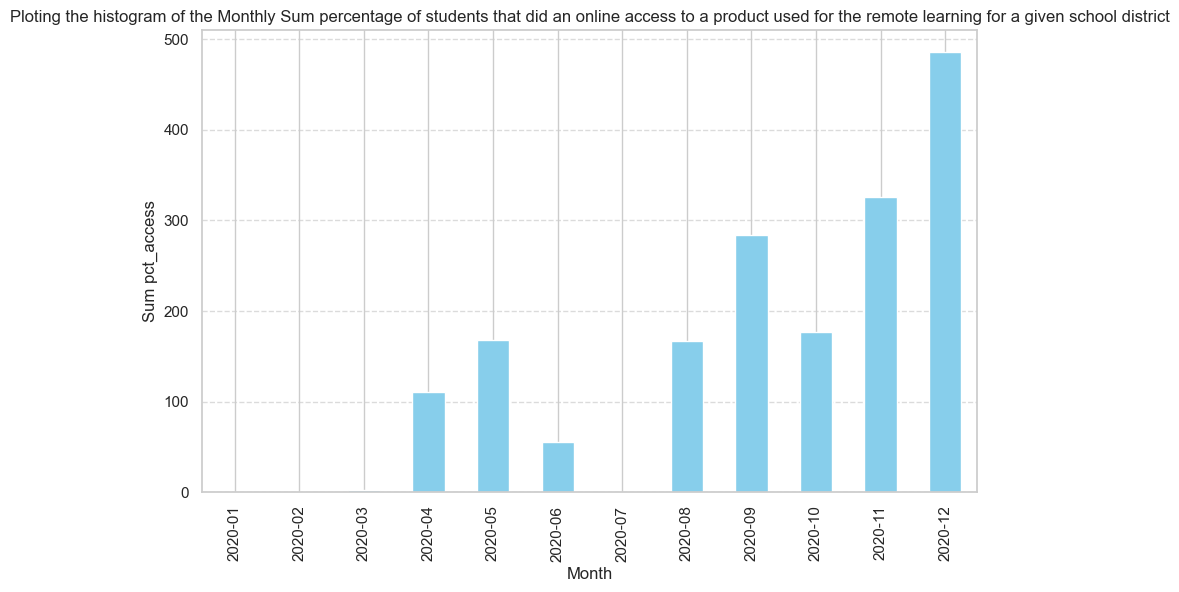

In [44]:

import pandas as pd
import matplotlib.pyplot as plt

df_eng_1000['time'] = pd.to_datetime(df_eng_1000['time'])

selected_lp_df = df_eng_1000[df_eng_1000['lp_id'].isin(LP_ID_Online_learning)]

selected_lp_df = selected_lp_df.sort_values(by='time')

# Group by month and calculate the sum pct_access for each month
monthly_means = selected_lp_df.groupby(selected_lp_df['time'].dt.to_period("M"))['pct_access'].sum()

# Plotting histogram
plt.figure(figsize=(10, 6))
monthly_means.plot(kind='bar', color='skyblue')
plt.title(f'Ploting the histogram of the Monthly Sum percentage of students that did an online access to a product used for the remote learning for a given school district')
plt.xlabel('Month')
plt.ylabel('Sum pct_access')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Now instead of only working with one school district
#### Let's aggregate data from all school district then calculate the Monthly sum of percentage of students that did an online access to any product for all school district and the sum of page load by student

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Files are in the 'engagement_data' folder
folder_path = 'engagement_data'
result_data = []

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df_eng = pd.read_csv(file_path)
        
        df_eng['time'] = pd.to_datetime(df_eng['time'])
        
        # Group by month and calculate the sum pct_access and engagement_index for each month
        monthly_means = df_eng.groupby(df_eng['time'].dt.to_period("M")).agg({
            'pct_access': 'sum',
            'engagement_index': 'sum'
        }).reset_index()

        file_id = filename.replace('.csv', '')

        # Append the results to the list
        result_data.append({
            'file_id': file_id,
            'monthly_sums': monthly_means
        })



In [46]:
import pandas as pd


# Create an empty DataFrame with columns for each month
result_df = pd.DataFrame(columns=['time'])

# Extract unique months from the first entry in result_data
months = result_data[0]['monthly_sums']['time']

# Set the 'time' column in the result_df DataFrame
result_df['time'] = months

# Iterate through each entry in result_data and extract sums values for each month
for entry in result_data:
    file_id = entry['file_id']
    monthly_sums = entry['monthly_sums']

    # Merge monthly_sums into result_df based on the 'time' column
    result_df = pd.merge(result_df, monthly_sums, on='time', how='left', suffixes=('', f'_{file_id}'))

# Now result_df contains columns like 'pct_access_3188', 'engagement_index_3188', 'pct_access_7305', 'engagement_index_7305', etc.

# Create new columns in result_df to store the average values for each month across all files
result_df['sum_pct_access'] = result_df.filter(like='pct_access').sum(axis=1)
result_df['sum_engagement_index'] = result_df.filter(like='engagement_index').sum(axis=1)

# Keep only the relevant columns
result_df = result_df[['time', 'sum_pct_access', 'sum_engagement_index']]

# Print or use result_df as needed
print(result_df)


       time  sum_pct_access  sum_engagement_index
0   2020-01      1029286.49          1.328270e+08
1   2020-02      1026597.29          2.104635e+08
2   2020-03      1017738.32          2.904103e+08
3   2020-04      1097602.95          3.159898e+08
4   2020-05       874546.66          2.354437e+08
5   2020-06       271479.74          7.269764e+07
6   2020-07        88386.75          2.397298e+07
7   2020-08       389693.52          1.126052e+08
8   2020-09      1433290.44          3.827525e+08
9   2020-10      1528351.81          3.993718e+08
10  2020-11      1334087.85          3.372261e+08
11  2020-12      1158905.06          3.264584e+08


/var/folders/96/rts76y6x0fxg8n44rg8hy14h0000gn/T/ipykernel_43978/2759972331.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['sum_pct_access'] = result_df.filter(like='pct_access').sum(axis=1)
/var/folders/96/rts76y6x0fxg8n44rg8hy14h0000gn/T/ipykernel_43978/2759972331.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['sum_engagement_index'] = result_df.filter(like='engagement_index').sum(axis=1)


In [47]:
import pandas as pd

result_df.reset_index(drop=True, inplace=True)  # Drop the existing index and reset

# Convert 'time' column to timestamp and then to datetime
result_df['time'] = pd.to_datetime(result_df['time'].astype(str)).dt.to_period('M')

# Extract the month values as strings
result_df['month'] = result_df['time'].dt.strftime('%Y-%m')

# Drop the original 'time' column if you no longer need it
result_df = result_df.drop(columns=['time'])


# Print the DataFrame with the added 'month' column
print(result_df)


    sum_pct_access  sum_engagement_index    month
0       1029286.49          1.328270e+08  2020-01
1       1026597.29          2.104635e+08  2020-02
2       1017738.32          2.904103e+08  2020-03
3       1097602.95          3.159898e+08  2020-04
4        874546.66          2.354437e+08  2020-05
5        271479.74          7.269764e+07  2020-06
6         88386.75          2.397298e+07  2020-07
7        389693.52          1.126052e+08  2020-08
8       1433290.44          3.827525e+08  2020-09
9       1528351.81          3.993718e+08  2020-10
10      1334087.85          3.372261e+08  2020-11
11      1158905.06          3.264584e+08  2020-12


#### For the sake of clarity we divided the value of percentage access and page load

In [48]:
result_df['sum_pct_access'] = result_df['sum_pct_access'].div(10000)
result_df['sum_engagement_index'] = result_df['sum_engagement_index'].div(1000000)
print(result_df)


    sum_pct_access  sum_engagement_index    month
0       102.928649            132.827031  2020-01
1       102.659729            210.463466  2020-02
2       101.773832            290.410343  2020-03
3       109.760295            315.989787  2020-04
4        87.454666            235.443670  2020-05
5        27.147974             72.697638  2020-06
6         8.838675             23.972978  2020-07
7        38.969352            112.605202  2020-08
8       143.329044            382.752541  2020-09
9       152.835181            399.371847  2020-10
10      133.408785            337.226123  2020-11
11      115.890506            326.458418  2020-12


#### Ploting the Monthly sum of percentage of students that did an online access to any product for all school district and the sum of page load by student

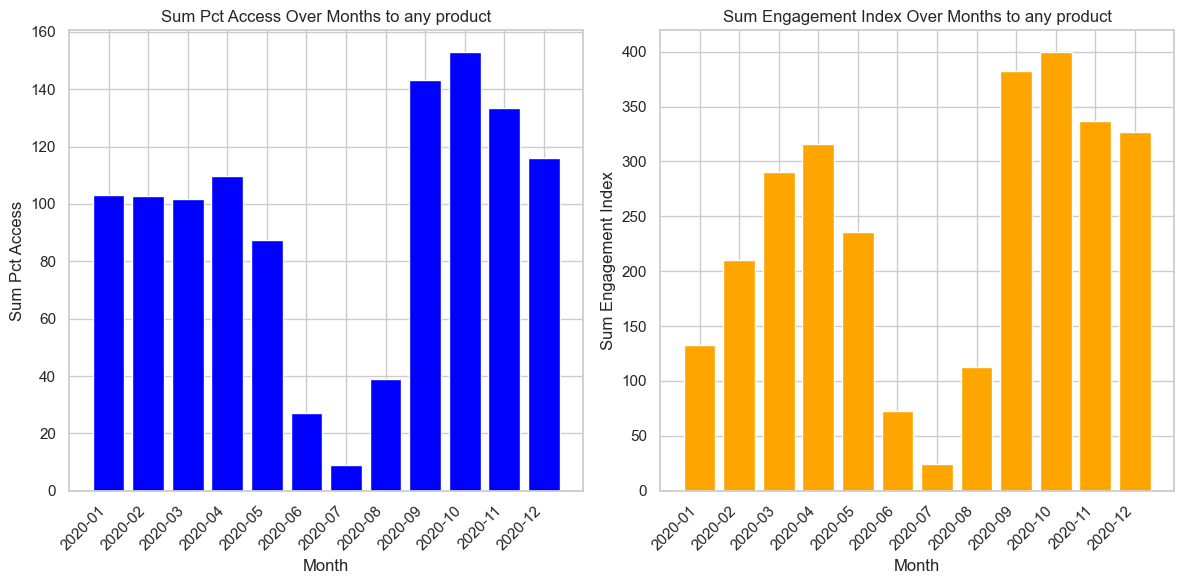

In [49]:
import matplotlib.pyplot as plt

# Assuming result_df is the DataFrame you obtained with the 'month' column
plt.figure(figsize=(12, 6))

# Plot bar chart for 'average_pct_access'
plt.subplot(1, 2, 1)
plt.bar(result_df['month'], result_df['sum_pct_access'], color='blue')
plt.title('Sum Pct Access Over Months to any product')
plt.xlabel('Month')
plt.ylabel('Sum Pct Access')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot bar chart for 'average_engagement_index'
plt.subplot(1, 2, 2)
plt.bar(result_df['month'], result_df['sum_engagement_index'], color='orange')
plt.title('Sum Engagement Index Over Months to any product')
plt.xlabel('Month')
plt.ylabel('Sum Engagement Index')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


#### Now similarly to before
#### Let's aggregate data from all school district then calculate the Monthly sum of percentage of students that did an online access a product used for the remote learning for all school district and the sum of page load by student

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Files are in the 'engagement_data' folder
folder_path = 'engagement_data'
result_data = []

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df_eng = pd.read_csv(file_path)
        
        df_eng['time'] = pd.to_datetime(df_eng['time'])
        df_eng = df_eng[df_eng['lp_id'].isin(LP_ID_Online_learning)]

        # Group by month and calculate the mean pct_access and engagement_index for each month
        monthly_means = df_eng.groupby(df_eng['time'].dt.to_period("M")).agg({
            'pct_access': 'sum',
            'engagement_index': 'sum'
        }).reset_index()

        file_id = filename.replace('.csv', '')

        # Append the results to the list
        result_data.append({
            'file_id': file_id,
            'monthly_sums': monthly_sums
        })

# Merge the monthly means into a single DataFrame
#result_df = pd.concat([entry['monthly_means'] for entry in result_data], axis=1).reset_index()


In [51]:
import pandas as pd

# Assuming result_data is the array you provided

# Create an empty DataFrame with columns for each month
result_df = pd.DataFrame(columns=['time'])

# Extract unique months from the first entry in result_data
months = result_data[0]['monthly_sums']['time']

# Set the 'time' column in the result_df DataFrame
result_df['time'] = months

# Iterate through each entry in result_data and extract average values for each month
for entry in result_data:
    file_id = entry['file_id']
    monthly_sums = entry['monthly_sums']

    # Merge monthly_means into result_df based on the 'time' column
    result_df = pd.merge(result_df, monthly_sums, on='time', how='left', suffixes=('', f'_{file_id}'))

# Now result_df contains columns like 'pct_access_3188', 'engagement_index_3188', 'pct_access_7305', 'engagement_index_7305', etc.

# Create new columns in result_df to store the average values for each month across all files
result_df['sum_pct_access'] = result_df.filter(like='pct_access').sum(axis=1)
result_df['sum_engagement_index'] = result_df.filter(like='engagement_index').sum(axis=1)

# Keep only the relevant columns
result_df = result_df[['time', 'sum_pct_access', 'sum_engagement_index']]




/var/folders/96/rts76y6x0fxg8n44rg8hy14h0000gn/T/ipykernel_43978/531559532.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['sum_pct_access'] = result_df.filter(like='pct_access').sum(axis=1)
/var/folders/96/rts76y6x0fxg8n44rg8hy14h0000gn/T/ipykernel_43978/531559532.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['sum_engagement_index'] = result_df.filter(like='engagement_index').sum(axis=1)


In [52]:
print(result_df)

       time  sum_pct_access  sum_engagement_index
0   2020-01       363062.93           36861615.88
1   2020-02       361424.94           63601583.61
2   2020-03       259091.34           50740100.11
3   2020-04       323667.29           56942336.43
4   2020-05       249363.59           42586379.28
5   2020-06         4357.10             447623.29
6   2020-07         6346.92             688025.70
7   2020-08       108144.62           21386664.58
8   2020-09       439251.60           89339572.12
9   2020-10       397111.22           77968298.37
10  2020-11       371993.82           70144556.80
11  2020-12       292797.12           57574053.02


In [53]:
#### Ploting the Monthly sum of percentage of students that did an online access to a product used for remote learning for all school district and the sum of page load by student

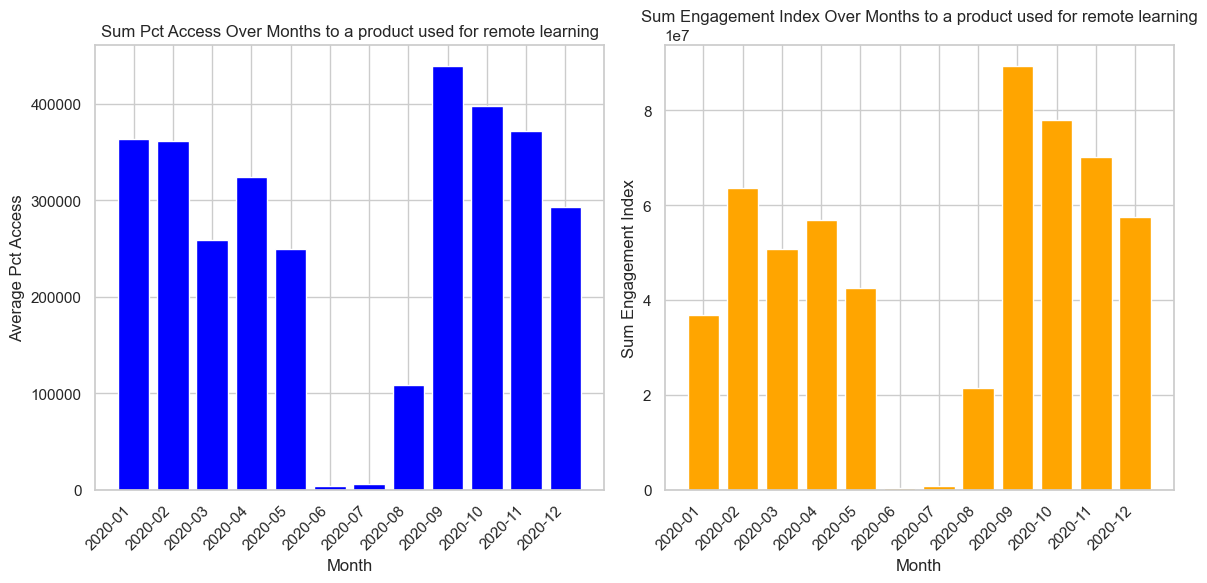

In [54]:
import pandas as pd

result_df.reset_index(drop=True, inplace=True)  # Drop the existing index and reset

# Convert 'time' column to timestamp and then to datetime
result_df['time'] = pd.to_datetime(result_df['time'].astype(str)).dt.to_period('M')

# Extract the month values as strings
result_df['month'] = result_df['time'].dt.strftime('%Y-%m')

# Drop the original 'time' column if you no longer need it
result_df = result_df.drop(columns=['time'])

import matplotlib.pyplot as plt

# Assuming result_df is the DataFrame you obtained with the 'month' column
plt.figure(figsize=(12, 6))

# Plot bar chart for 'average_pct_access'
plt.subplot(1, 2, 1)
plt.bar(result_df['month'], result_df['sum_pct_access'], color='blue')
plt.title('Sum Pct Access Over Months to a product used for remote learning')
plt.xlabel('Month')
plt.ylabel('Average Pct Access')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot bar chart for 'average_engagement_index'
plt.subplot(1, 2, 2)
plt.bar(result_df['month'], result_df['sum_engagement_index'], color='orange')
plt.title('Sum Engagement Index Over Months to a product used for remote learning')
plt.xlabel('Month')
plt.ylabel('Sum Engagement Index')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()



#### In the last two figures we've seen  the effect of the COVID-19 pandemic on online and distance learning

#### Now to study other facture let's first calculate the sum of pct_access and engagement_index for all school district monthly

In [55]:


import os
import pandas as pd

# files are in the 'engagement_data' folder
folder_path = 'engagement_data'
result_data = []

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df_eng = pd.read_csv(file_path)
        
        df_eng['time'] = pd.to_datetime(df_eng['time'])
        #df_eng = df_eng[df_eng['lp_id'].isin(LP_ID_Online_learning)]

        
       
        
        # Calculate the sum pct_access
        sum_pct = df_eng['pct_access'].sum()

        # Calculate the sum pct_access 
        sum_engag = df_eng['engagement_index'].sum()
        file_id = filename.replace('.csv', '')

        # Append the results to the list
        result_data.append({
            'file_id': file_id,
            'sum_pct': sum_pct,
            'sum_engag': sum_engag
        })

# Convert the list to a pandas DataFrame
result_df = pd.DataFrame(result_data)


# Print or use the result_df as needed
print(result_df["sum_pct"].sum())
print(result_df["sum_engag"].sum())



11249966.88
2840219043.88


In [56]:
result_df.head()

,file_id,sum_pct,sum_engag
0,3188,34176.19,6681330.96
1,7305,31005.16,9347443.55
2,7675,56053.88,18788734.08
3,1204,30097.38,5532194.81
4,4591,43347.93,9351810.83


In [57]:
result_df = result_df.astype({"file_id": int})
result_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_id    233 non-null    int64  
 1   sum_pct    233 non-null    float64
 2   sum_engag  233 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.6 KB


### Merge new data with the district table

#### In the following figures we will analyze the student engagement with online learning platforms relate to different geography, Demographic context, race/ethnicity Learning contexts, and Socioeconomic status.

In [58]:

# Convert 'district_id' in df_districts_cleaned_imputed_outliers to the same data type as 'file_id' in result_df

# Merge dataframes based on 'file_id' and 'district_id'
merged_df = pd.merge(df_districts_cleaned_imputed_outliers, result_df, left_on='district_id', right_on='file_id', how='inner')

# Drop the redundant 'file_id' column (if needed)
merged_df = merged_df.drop(columns=['file_id'])

# Now merged_df contains all columns from both dataframes with a common 'file_id'/'district_id'


In [59]:
merged_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,sum_pct,sum_engag
0,8815,Illinois,Suburb,0.1,0.1,0.59,15000.0,93158.92,31286114.35
1,4921,Utah,Suburb,0.1,0.3,0.59,7000.0,35986.42,7736041.38
2,5987,Wisconsin,Suburb,0.1,0.1,0.59,11000.0,73388.34,18403233.35
3,3710,Utah,Suburb,0.1,0.5,0.59,7000.0,20975.49,5734197.56
4,7177,North Carolina,Suburb,0.3,0.3,0.59,9000.0,37975.75,8591172.31


In [60]:
merged_df['pct_black/hispanic'].value_counts()

pct_black/hispanic
0.1    116
0.3     24
0.5     17
0.7     11
0.9      8
Name: count, dtype: int64

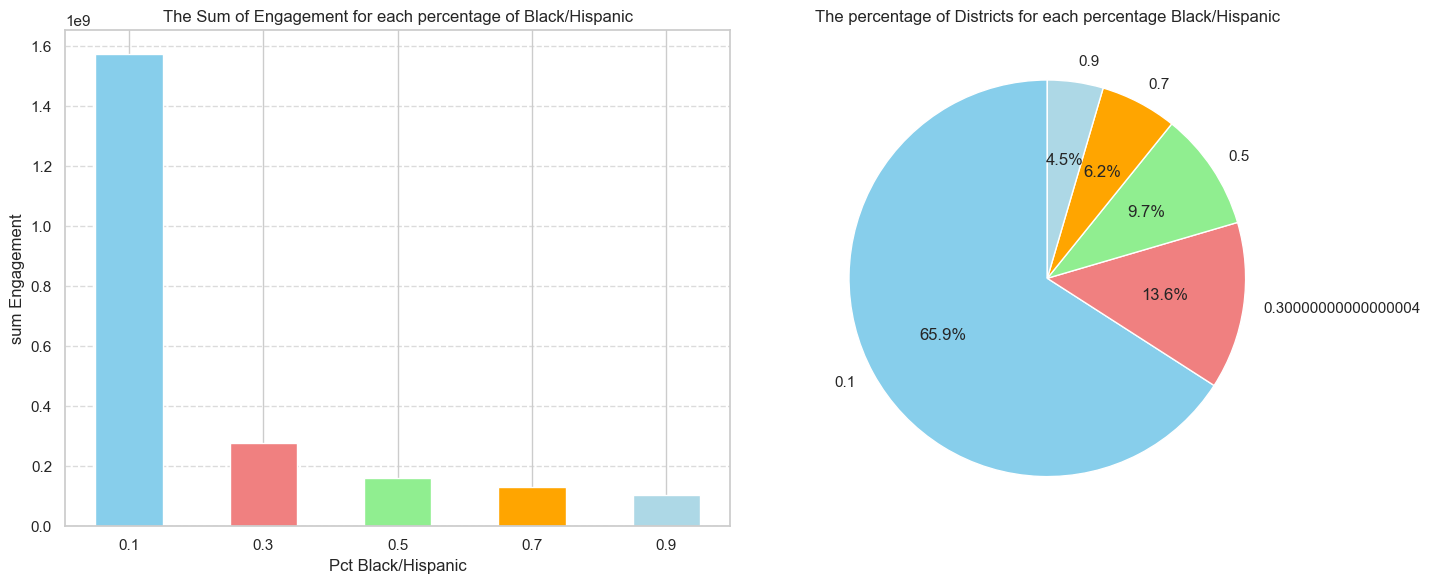

In [61]:
import matplotlib.pyplot as plt

# Group by 'pct_black/hispanic' and calculate the sum for 'average_engag'
grouped_df_engag = merged_df.groupby('pct_black/hispanic')['sum_engag'].sum().reset_index()

# Group by 'pct_black/hispanic' and calculate the count for 'district_id'
grouped_df_count = merged_df.groupby('pct_black/hispanic')['district_id'].count().reset_index()

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the first figure with different colors
colors_engag = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue', 'salmon', 'lime', 'gold']  
axs[0].bar(grouped_df_engag['pct_black/hispanic'], grouped_df_engag['sum_engag'], color=colors_engag, width=0.1)
axs[0].set_title('The Sum of Engagement for each percentage of Black/Hispanic')
axs[0].set_xlabel('Pct Black/Hispanic')
axs[0].set_ylabel('sum Engagement')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].set_xticks(grouped_df_engag['pct_black/hispanic'])  # Set x-ticks to only include pct_black/hispanic values

# Plotting the second figure as a circular chart (pie chart) with different colors
colors_count = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue', 'salmon', 'lime', 'gold']  # Add more colors as needed
axs[1].pie(grouped_df_count['district_id'], labels=grouped_df_count['pct_black/hispanic'], autopct='%1.1f%%', colors=colors_count, startangle=90)
axs[1].set_title('The percentage of Districts for each percentage Black/Hispanic')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


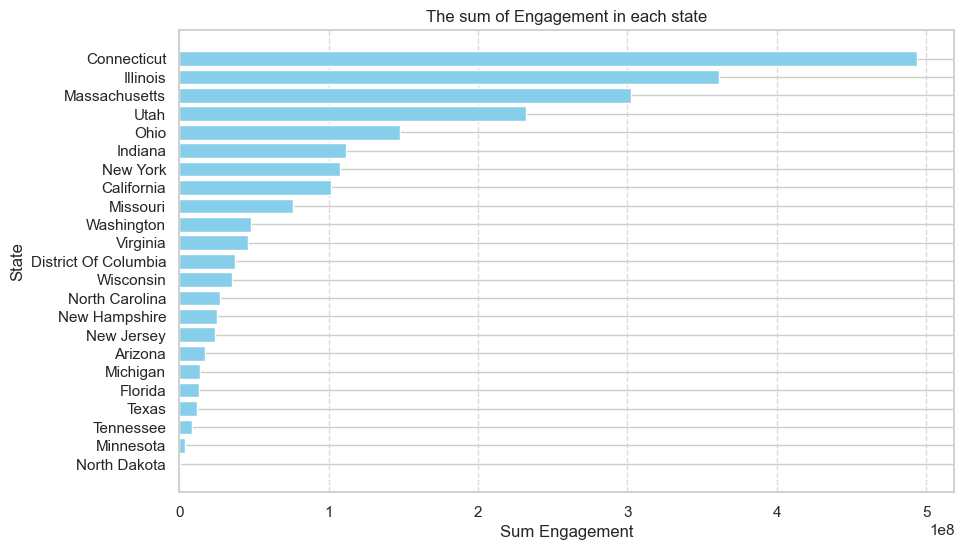

In [62]:
import matplotlib.pyplot as plt

# Group by 'state' and calculate the sum for 'sum_engag'
grouped_df = merged_df.groupby('state')['sum_engag'].sum().reset_index()

# Sort the DataFrame by 'sum_engag'
grouped_df = grouped_df.sort_values(by='sum_engag', ascending=True)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(grouped_df['state'], grouped_df['sum_engag'], color='skyblue')
plt.title('The sum of Engagement in each state')
plt.xlabel('Sum Engagement')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


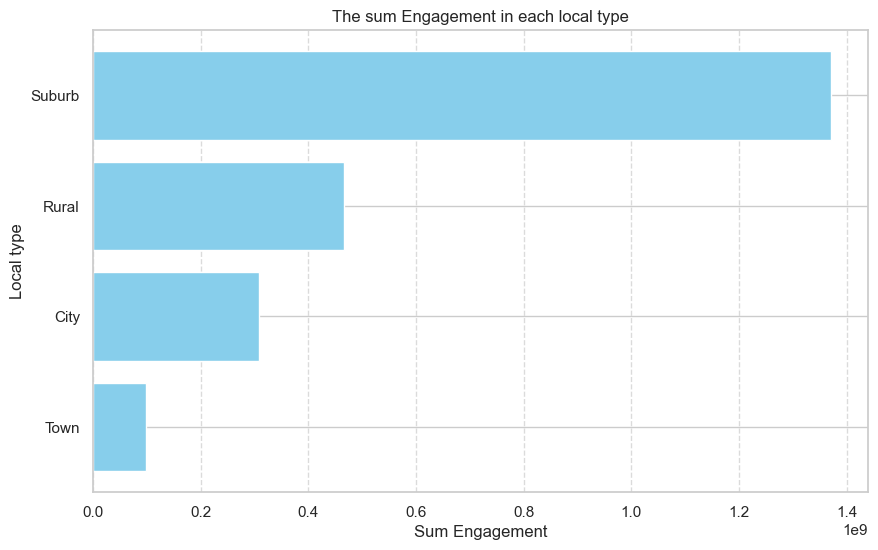

In [63]:
import matplotlib.pyplot as plt

# Group by 'state' and calculate the sum for 'sum_engag'
grouped_df = merged_df.groupby('locale')['sum_engag'].sum().reset_index()

# Sort the DataFrame by 'sum_engag'
grouped_df = grouped_df.sort_values(by='sum_engag', ascending=True)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(grouped_df['locale'], grouped_df['sum_engag'], color='skyblue')
plt.title('The sum Engagement in each local type')
plt.xlabel('Sum Engagement')
plt.ylabel('Local type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

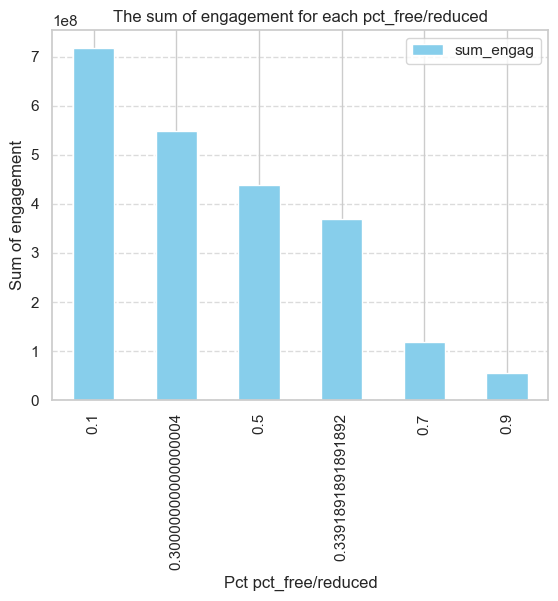

In [64]:

import matplotlib.pyplot as plt

# Group by 'pct_free/reduced' and calculate the mean for 'sum_pct' and 'average_engag'
grouped_df = merged_df.groupby('pct_free/reduced')[['sum_engag']].sum()

grouped_df = grouped_df.sort_values(by='sum_engag', ascending=False)

# Plotting histogram
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', color='skyblue')
plt.title('The sum of engagement for each pct_free/reduced')
plt.xlabel('Pct pct_free/reduced')
plt.ylabel('Sum of engagement')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

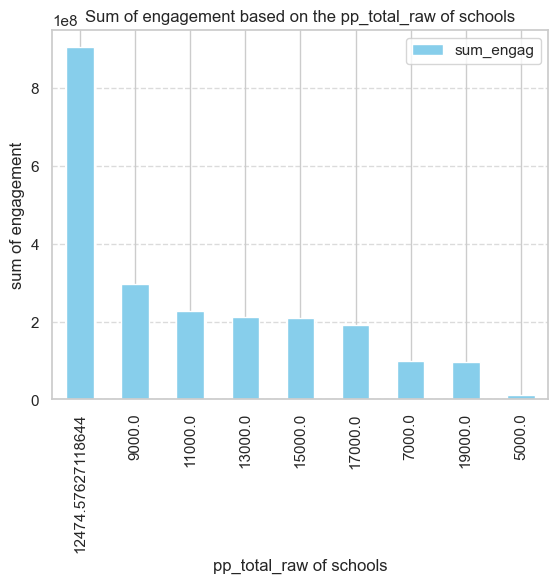

In [65]:

import matplotlib.pyplot as plt

# Group by 'pp_total_raw' and calculate the mean for 'sum_pct' and 'average_engag'
grouped_df = merged_df.groupby('pp_total_raw')[['sum_engag']].sum()
grouped_df = grouped_df.sort_values(by='sum_engag', ascending=False)


# Plotting histogram
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', color='skyblue')
plt.title('Sum of engagement based on the pp_total_raw of schools')
plt.xlabel('pp_total_raw of schools')
plt.ylabel('sum of engagement')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
